In [30]:
#00abf8fa0003f155f70039ed1f306b3461684d.html'):

#print(glob(r'/kaggle/input/resumes-agro/*'))

#7zOCF908AC0/0ac1a1be00077c186e0039ed1f59524e533471.html

cols = [
    'location',
    'title',
    'specs',
    'salary',
    'zgr',
    'exp_d',
    'skills',
    'driver',
    'about',
    'recomend',
    'portfolio',
    'edus_d',
    'languages',
    'a_edus_d',
    'tests_d',
    'cert',
    'add_infos'
]

#res_dict = dict.fromkeys(cols, [])

def parse_resume(path):
    with open(path, 'r', encoding = 'utf-8') as f:
        soup = BeautifulSoup(f, 'html.parser')
        location = t(soup.find('div', {'class':'resume-header'}).select('div[class="bloko-translate-guard"]')[-1].p)
        title_ = t(soup.select_one('span[data-qa="resume-block-title-position"]'))
        specs = t(soup.select_one('li[data-qa="resume-block-position-specialization"]'))
        salary_ = t(soup.select_one('span[class="resume-block__salary"]'))
        zgr = soup.select_one('div[class="resume-block-item-gap"]')
        if zgr:
            zgr = [t(i) for i in zgr.find_all('p')]

#         expirience = {
#             'time':set(),
#             'name':set(),
#             'position':set(),
#             'place':set(),
#             'industry':set()
#         }
        expirience = set()
        exp_divs = soup.select_one('div[data-qa="resume-block-experience"]')
        if exp_divs:
            exp_divs = exp_divs.find_all('div', {'class':'bloko-columns-row'})
            exp_title = t(exp_divs[0])
            #print(exp_title)
            #print('-'*100)

            

            for block in exp_divs[1:]:
                time_ = block.find('div', {'class':'bloko-column bloko-column_xs-4 bloko-column_s-2 bloko-column_m-2 bloko-column_l-2'})
                name_ = block.find('div', {'class':'bloko-text bloko-text_strong'})
                position = block.select_one('div[data-qa="resume-block-experience-position"]')
                #None block
                place = block.find('p')
                industry = block.select_one('div[data-qa="resume-block__experience-industries resume-block_no-print"]')
                desc = block.select_one('div[data-qa="resume-block-experience-description"]')
        
#                 expirience['time'].add(t(time_))
#                 expirience['name'].add(t(name_))
#                 expirience['position'].add(t(position))
#                 expirience['place'].add(t(place))
#                 expirience['industry'].add(t(industry))
                
                
                
                expirience.add(t(time_) + 'ඞ' + t(name_)+ 'ඞ' + t(position)+ 'ඞ' + t(place) + 'ඞ' + t(desc))
                
                
                
#                 print(time_, name_, position , place, desc)
#                 print('-'*100)
        
        
        
        skills = soup.select_one('div[class="bloko-tag-list"]')
        if skills:
            skills = [t(i) for i in skills.find_all('div')]
            #print('-'*100)
        
        
        
        driver = t(soup.select_one('div[data-qa="resume-block-driver-experience"]'))
        
#         print(driver) #распарсить имеется собственный автомобиль
#         print('-'*100)
        
        about_ = t(soup.select_one('div[data-qa="resume-block-skills"]'))
        
#         print(about_) #убрать обомне
#         print('-'*100)
        recomend = t(soup.select_one('div[data-qa="recommendation-item-title"]'))
        
#         print(recomend)
#         print('-'*100)
        portfolio = t(soup.select_one('div[data-qa="resume-block-portfolio"]'))
#         print(portfolio)
#         print('-'*100)
        edus = soup.select_one('div[data-qa="resume-block-education"]')
    
        edus_d = set()
        if edus:
            for edu in edus.find_all('div', {'class':'bloko-columns-row'})[2:]:
                years = edu.select_one('div[class="bloko-column bloko-column_xs-4 bloko-column_s-2 bloko-column_m-2 bloko-column_l-2"]')
                name = edu.select_one('div[data-qa="resume-block-education-name"]')
                place = edu.select_one('div[data-qa="resume-block-education-organization"]')
                edus_d.add(t(years) + 'ඞ' + t(name) + 'ඞ' + t(place))
                
                
#                 edus_d['year'].append(t(years))
#                 edus_d['name'].append(t(name))
#                 edus_d['place'].append(t(place))
#                 print(years, desc, place)
#                 print('-'*100)
        
        languages = [t(i) for i in soup.select('p[data-qa="resume-block-language-item"]')]
#         print(languages)
#         print('-'*100)
        a_edu_info = soup.select_one('div[data-qa="resume-block-additional-education"]')
        
#         a_edu_dict = {
#             'year':set(),
#             'desc':set()
#         }
        a_edu_dict = set()
        if a_edu_info:
            for a_info in a_edu_info.find_all('div', {'class':'resume-block-item-gap'}):
                year_ = a_info.find('div', {'class':'bloko-column bloko-column_xs-4 bloko-column_s-2 bloko-column_m-2 bloko-column_l-2'})
                desc_ = a_info.select_one('div[data-qa="resume-block-education-item"]')
                
#                 a_edu_dict['year'].add(t(year_))
#                 a_edu_dict['desc'].add(t(desc_))
                a_edu_dict.add(t(year_) + 'ඞ' + t(desc_))
                    

#                 print(year_, desc_)
#                 print('-'*100)
#         print('TESTS')
        tests_info = soup.select_one('div[data-qa="resume-block-attestation-education"]')
    
        
#         tests_info_dict = {
#             'year':set(),
#             'desc':set()
#         }
        tests_info_dict = set()
        if tests_info:
            for test_info in tests_info.find_all('div', {'class':'resume-block-item-gap'}):
                year_ = test_info.find('div', {'class':'bloko-column bloko-column_xs-4 bloko-column_s-2 bloko-column_m-2 bloko-column_l-2'})
                desc_ = test_info.select_one('div[data-qa="resume-block-education-item"]')
                
#                 tests_info_dict['year'].add(t(year_))
#                 tests_info_dict['desc'].add(t(desc_))
# 

                tests_info_dict.add(t(year_) + 'ඞ' + t(desc_))
                
#                 print(year_, desc_)
#                 print('-'*100)
            
        cert = t(soup.find('div', {'class':'resume-certificates'}))
#         print(cert)
#         print('-'*100)
        add_info = soup.select_one('div[data-qa="resume-block-additional"]')
        if add_info:
            add_info = [t(i) for i in add_info.find_all('p')]
#         print(add_info)
#         print('-'*100)
        return location, title_, specs, salary_, zgr, list(expirience), skills, driver, about_, recomend, portfolio, list(edus_d), languages, list(a_edu_dict), list(tests_info_dict), cert, add_info

In [31]:
from bs4 import BeautifulSoup
from glob import glob

res_ = []

for path_ in glob('/kaggle/input/resumes-agro/*'):
    res_.append(parse_resume(path_))

<div class="bloko-column bloko-column_xs-4 bloko-column_s-2 bloko-column_m-2 bloko-column_l-2">Июль<!-- --> <!-- -->2019<!-- --> — <span class="resume-block__experience-mount-last">Август</span> <!-- -->2019<div class="bloko-text bloko-text_tertiary"><span>2<!-- --> <!-- -->месяца</span></div></div> <div class="bloko-text bloko-text_strong"><a class="bloko-link bloko-link_kind-tertiary" href="/employer/201?hhtmFrom=resume">KPMG (Москва)</a></div> <div class="bloko-text bloko-text_strong" data-qa="resume-block-experience-position">Стажер</div> <p>Москва<!-- -->, <a class="bloko-link bloko-link_kind-tertiary" href="http://www.kpmg.ru">www.kpmg.ru</a></p> <div data-qa="resume-block-experience-description">Работа в отделе консультирования по управлению рисками</div>
----------------------------------------------------------------------------------------------------
<div class="bloko-column bloko-column_xs-4 bloko-column_s-2 bloko-column_m-2 bloko-column_l-2">Июль<!-- --> <!-- -->2019<!-- -

KeyboardInterrupt: 

In [2]:
import re
import json
import nltk
import string
from tqdm.notebook import tqdm
from num2words import num2words
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import numpy as np

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
data = json.load(open('/kaggle/input/json-data/resume_d_of_a_02.json','r'))

In [4]:
def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)

In [5]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [36]:
def remove_punct(text):
    text = text.replace('-', ' ')
    table=str.maketrans(string.punctuation, ' '*len(string.punctuation))
    return text.translate(table)

In [34]:
stop_en=set(stopwords.words('english'))
stop_ru = set(stopwords.words('russian') + ['ооо', 'зао', ' ао ',' ао', 'ип', 'оао', ' сз ', ' сз'])

In [8]:
def create_corpus(text):
    corpus=[]
    for sent in text.split(' '):
        words=[word.lower() for word in word_tokenize(sent) if ((word.isalpha()==True) & (word.lower() not in stop_ru))]
        corpus.extend(words)
    return corpus

In [9]:
!python -m spacy download ru_core_news_lg

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 513.4/513.4 MB 2.6 MB/s eta 0:00:0000:0100:01
  Obtaining dependency information for pymorphy3>=1.0.0 from https://files.pythonhosted.org/packages/d7/f9/ffb9afde503dc6bb2361ea79ceaea18138fbcee32aec4c5d8efa49180753/pymorphy3-1.2.1-py3-none-any.whl.metadata
  Obtaining dependency information for docopt-ng>=0.6 from https://files.pythonhosted.org/packages/6c/4a/c3b77fc1a24510b08918b43a473410c0168f6e657118807015f1f1edceea/docopt_ng-0.9.0-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 49.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.4/55.4 kB 6.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via sp

In [10]:
import spacy

lemmatizer = spacy.load("ru_core_news_lg")
# print(token.text, token.pos_, token.dep_)

In [175]:
vocab = []
# full_sent = []
for exps in tqdm(data['exp_d']):
    vocab_loc_loc = []
    for data_loc in exps:
        vocab_loc = []
#         print(data_loc, end='----')
    #     sent_loc = []
        clean = [remove_emoji(remove_URL(i.replace('\xa0', ' ').replace('\n', ' '))) for i in data_loc.split('ඞ')]
        try:
            clean[0] = clean[0].replace('по настоящее время','9999').replace('currently','9999')
            splited = clean[0].split(' ')
            if len(splited) == 6:
                clean[0] = num2words(splited[4][4:], lang='ru') + ' ' + splited[-1]
            elif len(splited) == 8:
                clean[0] = num2words(splited[4][4:], lang='ru') + ' ' + splited[5] + ' ' + num2words(splited[6], lang='ru')+ ' ' + splited[7]
            elif len(splited) == 5:
                clean[0] = num2words(splited[3][4:], lang='ru') + ' ' + splited[-1]
        except:
            print(clean[0].split(' '), 'bad')
            
        clean[0] = ''
        clean[3] = clean[3].split(', ')[0]
        clean[3] = ''
        clean[2] = clean[2].replace("зам. ", "заместитель ")
        clean[2] = clean[2].replace("нач. ", "начальник ")
        clean[2] = clean[2].replace("рук. ", "начальник ")
        clean[2] = clean[2].replace("ген. ", "начальник ")
        clean[2] = clean[2].replace("гендиректор", "начальник ")
        clean[2] = clean[2].replace("руководитель", "начальник ")
        clean[2] = clean[2].replace("директор", "начальник ")
        clean[2] = clean[2].replace("старший", "начальник ")
        clean[2] = clean[2].replace("главный", "начальник ")
        
        no_punkt = [remove_punct(i) for i in clean]
        infos = []
        for part in no_punkt:
            infos.extend([i.lemma_ if len(i.text) > 2 else '' for i in lemmatizer(part)])
        for info in infos:
            corp_ = create_corpus(info)
            if len(corp_) > 0:
                vocab_loc.append(corp_)
        vocab_loc_loc.append(vocab_loc)
    #             sent_loc.append(' '.join([i for i in corp_]))
#     print(vocab_loc)
    vocab.append(vocab_loc_loc)
    #     full_sent.append(' '.join([i for i in sent_loc]))


  0%|          | 0/1001 [00:00<?, ?it/s]

In [10]:
vocab_skills = []
for data_loc in tqdm(data['skills']):
    vocab_loc = []
    clean = [remove_emoji(remove_URL(i.replace('\xa0', ' ').replace('\n', ' '))) for i in data_loc]
#     print(clean)
    for info in [remove_punct(i) for i in clean]:
        corp_ = create_corpus(info)
        if len(corp_) > 0:
            vocab_loc.append(corp_)
    vocab_skills.append(vocab_loc)

  0%|          | 0/1001 [00:00<?, ?it/s]

In [26]:
vocab_driver = []
for data_loc in tqdm(data['driver']):
    vocab_loc = []
    clean = remove_emoji(remove_URL(data_loc.replace('\xa0', ' ').replace('\n', ' ')))
    clean = clean.split()[4:]
#     print(clean)
    for info in [remove_punct(i) for i in clean]:
        corp_ = create_corpus(info)
        if len(corp_) > 0:
            vocab_loc.append(corp_)
    vocab_driver.append(vocab_loc)
# data['driver'][7].split()[4:]

  0%|          | 0/1001 [00:00<?, ?it/s]

In [ ]:
vocab_lang = []
for data_loc in tqdm(data['languages']):
    vocab_loc = []
    clean = [remove_emoji(remove_URL(i.replace('\xa0', ' ').replace('\n', ' '))) for i in data_loc]
#     print(clean)
    for info in [remove_punct(i) for i in clean]:
        corp_ = create_corpus(info)
        if len(corp_) > 0:
            vocab_loc.append(corp_)
    vocab_lang.append(vocab_loc)

In [ ]:
vocab_salary = []
for data_loc in tqdm(data['salary']):
    vocab_loc = []
    salary_ = data_loc.replace('\u2009','').replace('\xa0₽', '').replace('\xa0', '').split()
    if len(salary_) > 0:
#         print(remove_emoji(remove_URL(salary_[0])))
        clean = 'зарплата ' + num2words(''.join(e for e in remove_emoji(remove_URL(salary_[0])) if e.isnumeric()), lang='ru')
    else:
        clean = 'зарплата не указана'
#     print(clean)
    vocab_salary.append(clean.lower())

In [ ]:
vocab_edus = []
for edus in tqdm(data['edus_d']):
    vocab_loc_loc = []
    for data_loc in edus:
        vocab_loc = []
    #     sent_loc = []
        clean = [remove_emoji(remove_URL(i.replace('\xa0', ' ').replace('\n', ' '))) for i in data_loc.split('ඞ')]
        clean[0] = num2words(clean[0], lang = 'ru')    
        for info in [remove_punct(i) for i in clean]:
            corp_ = create_corpus(info)
            if len(corp_) > 0:
                vocab_loc.append(corp_)
        vocab_loc_loc.append(vocab_loc)
    #             sent_loc.append(' '.join([i for i in corp_]))
    vocab_edus.append(vocab_loc_loc)

In [70]:
strings_ = []
for i in range(len(vocab)):
    resume_batch = []
    for exp in vocab[i]:
        str_ = ''
        for j, exp_field in enumerate(exp):
            str_+=' '.join(exp_field) + ' '
        
#         str_+='\n'
#         for drv in vocab_driver[i]:
#             str_+=' '.join([i for i in drv])+' '
#         for lng in vocab_lang[i]:
#             str_+=' '.join([i for i in lng])+' '
#         str_+=vocab_salary[i]
#         for skill in vocab_skills[i]:
#             str_+=' '.join([i for i in skill[:3]])+'\n'
#         for edu in vocab_edus[i]:
#             for edu_field in edu:
#                 str_+=' '.join([i for i in edu_field])
#             str_+='\n'
        resume_batch.append(str_.strip())
    strings_.append(resume_batch)

In [71]:
strings_flat = [item for sublist in strings_ for item in sublist]

In [73]:
strings_flat_new = []
for i in strings_flat:
    cleared = i.replace(' тч ', '').replace(' тч', '').replace(' тд','').replace(' тд ','').replace(' вет ','ветеринарный')
    strings_flat_new.append(' '.join([i if len(i) > 2 else '' for i in cleared.split()]))

In [89]:
strings_batch_new = []
for batch in strings_:
    loc = []
    for i in batch:
        cleared = i.replace(' тч ', '').replace(' тч', '').replace(' тд','').replace(' тд ','').replace(' вет ','ветеринарный')
        loc.append(' '.join([i if len(i) > 2 else '' for i in cleared.split()]))
    strings_batch_new.append(loc)

In [81]:
# sorted(strings_flat_new, key = lambda x: len(x), reverse=True)

In [82]:
strings_flat = strings_flat_new

In [91]:
import pickle
with open('sents_batched_06_lemms_desc_l_news_no_place.pkl', 'wb') as f:
    pickle.dump(strings_batch_new, f)

In [265]:
import pickle
with open('/kaggle/input/last-modeling/sents_batched_06_lemms_desc_l_news_no_place.pkl', 'rb') as f:
    strings_ = pickle.load(f)

In [266]:
strings_flat = [item for sublist in strings_ for item in sublist]

In [267]:
from sentence_transformers import SentenceTransformer, util
model_bert = SentenceTransformer('/kaggle/input/last-modeling/model_7_epochs_lemma_no_place/kaggle/working/output/tsdae-model-cleared-no-location')

In [268]:
model_bert.cuda()

SentenceTransformer(
  (0): Transformer({'max_seq_length': 2048, 'do_lower_case': False}) with Transformer model: BertModel 
  (1): Pooling({'word_embedding_dimension': 312, 'pooling_mode_cls_token': True, 'pooling_mode_mean_tokens': False, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False})
  (2): Normalize()
)

In [94]:
from sentence_transformers import SentenceTransformer, LoggingHandler
from sentence_transformers import models, util, datasets, evaluation, losses
from torch.utils.data import DataLoader

train_dataset = datasets.DenoisingAutoEncoderDataset(strings_flat)

train_dataloader = DataLoader(train_dataset, batch_size=8, shuffle=True)

In [95]:
train_loss = losses.DenoisingAutoEncoderLoss(model_bert, decoder_name_or_path='cointegrated/rubert-tiny2', tie_encoder_decoder=True)

Some weights of BertLMHeadModel were not initialized from the model checkpoint at /root/.cache/torch/sentence_transformers/cointegrated_rubert-tiny2/ and are newly initialized: ['bert.encoder.layer.1.crossattention.self.query.bias', 'bert.encoder.layer.2.crossattention.self.query.bias', 'bert.encoder.layer.2.crossattention.self.value.bias', 'bert.encoder.layer.1.crossattention.self.query.weight', 'bert.encoder.layer.0.crossattention.self.query.bias', 'bert.encoder.layer.2.crossattention.self.value.weight', 'bert.encoder.layer.1.crossattention.self.key.bias', 'bert.encoder.layer.0.crossattention.self.key.weight', 'bert.encoder.layer.0.crossattention.output.LayerNorm.weight', 'bert.encoder.layer.1.crossattention.output.dense.bias', 'bert.encoder.layer.1.crossattention.output.dense.weight', 'bert.encoder.layer.2.crossattention.output.LayerNorm.bias', 'bert.encoder.layer.0.crossattention.output.dense.bias', 'bert.encoder.layer.0.crossattention.self.query.weight', 'bert.encoder.layer.2.cros

In [96]:
model_bert.fit(
    train_objectives=[(train_dataloader, train_loss)],
    epochs=6,
    weight_decay=0,
    scheduler='constantlr',
    optimizer_params={'lr': 3e-5},
    show_progress_bar=True
)

model_bert.save('output/tsdae-model-cleared-no-location')

Epoch:   0%|          | 0/6 [00:00<?, ?it/s]

Iteration:   0%|          | 0/557 [00:00<?, ?it/s]

We strongly recommend passing in an `attention_mask` since your input_ids may be padded. See https://huggingface.co/docs/transformers/troubleshooting#incorrect-output-when-padding-tokens-arent-masked.


Iteration:   0%|          | 0/557 [00:00<?, ?it/s]

Iteration:   0%|          | 0/557 [00:00<?, ?it/s]

Iteration:   0%|          | 0/557 [00:00<?, ?it/s]

Iteration:   0%|          | 0/557 [00:00<?, ?it/s]

Iteration:   0%|          | 0/557 [00:00<?, ?it/s]

In [97]:
!zip -r model_7_epochs_lemma_no_place.zip /kaggle/working/output/tsdae-model-cleared-no-location/*

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  adding: kaggle/working/output/tsdae-model-cleared-no-location/1_Pooling/ (stored 0%)
  adding: kaggle/working/output/tsdae-model-cleared-no-location/1_Pooling/config.json (deflated 49%)
  adding: kaggle/working/output/tsdae-model-cleared-no-location/2_Normalize/ (stored 0%)
  adding: kaggle/working/output/tsdae-model-cleared-no-location/README.md (deflated 53%)
  adding: kaggle/working/output/tsdae-model-cleared-no-location/config.json (deflated 48%)
  adding: kaggle/working/output/tsdae-model-cleared-no-location/config_sentence_transformers.json (deflated 30%)
  adding: kaggle/working/output/tsdae-model-cleared-no-location/model.safetensors (deflated 8%)
  adding: kaggle/working/output/tsdae-model-cleared-no-location/modules.json (deflated 62%)
  adding: kaggle/working/output/tsdae-model-cleared-no-location/sentence_bert_config.json (deflated 4%)
  adding: kaggle/working/output/tsdae-model-cleared-no-location/special_tokens_map.json (deflated 42%)
  adding: kaggle/working/output/tsd

In [720]:
from umap import UMAP

umap_model = UMAP(n_neighbors=15, n_components=128, min_dist=0.00001, metric='cosine') #128

In [19]:
# from hdbscan import HDBSCAN

# hdbscan_model = HDBSCAN(min_cluster_size=10, prediction_data=True)

In [721]:
from sklearn.cluster import AgglomerativeClustering
#25 ok
hdbscan_model = AgglomerativeClustering(n_clusters=25, compute_distances = True, metric = 'cosine', linkage='complete')

In [579]:
import random

In [589]:
strings_90 = random.sample(strings_, int(len(strings_)*0.9))

In [590]:
strings_flat90 = [item for sublist in strings_90 for item in sublist]

In [591]:
len(strings_flat90)

4020

In [722]:
embeddings = model_bert.encode(strings_flat)

Batches:   0%|          | 0/140 [00:00<?, ?it/s]

In [723]:
emb_umaped = umap_model.fit_transform(embeddings)

In [724]:
cluster_labels = hdbscan_model.fit_predict(emb_umaped)

In [725]:
labels_unique = np.unique(cluster_labels)

In [726]:
adaj_matr = np.zeros((len(strings_flat), len(strings_flat)))
x = []
y = []
glob_id_to_loc = dict.fromkeys(list(range(len(strings_flat))), -1)



glob_id = 0
true_indx = 0
for batches in strings_:
    if len(batches) > 1:
        for rab in range(len(batches) - 1):            
            adaj_matr[glob_id, glob_id+1] = 1
            adaj_matr[glob_id+1, glob_id] = 1
            glob_id_to_loc[glob_id] = true_indx
            x.append(embeddings[glob_id])
            y.append(embeddings[glob_id + 1])
            glob_id+=1
            true_indx+=1
        glob_id_to_loc[glob_id] = true_indx
        if (glob_id + 1) < len(strings_flat):
            x.append(embeddings[glob_id])
            y.append(embeddings[glob_id + 1])
#     else:
#         true_indx+=1
#         print(batches)
#         print(strings_flat[glob_id])
    glob_id+=1
loc_id_to_glob = dict((v,k) for k,v in glob_id_to_loc.items())

In [675]:
from scipy.spatial import distance

In [709]:
link_dict = {}

full_edges = []
for label in tqdm(labels_unique):
    glob_ids = np.where(cluster_labels == label)[0]
    edge_loc = []
    target_clusters = []#!
    for glob_id in glob_ids:
        loc_id_for_edge = glob_id_to_loc[glob_id]
        edges_ids = np.where(edge_matrix_np[:, 0] == loc_id_for_edge)[0]
        edges = edge_matrix_np[edges_ids, :]
        for edge in edges:
            target_glob_id = loc_id_to_glob[edge[1]]
            if target_glob_id == -1:
                print('no connection')
            else:
                target_clusters.append(cluster_labels[target_glob_id]) #!
        edge_loc.extend(edges)
    full_edges.append(edge_loc)
    link_dict[label] = target_clusters
    
    
    
#     best_ = Counter(list(target_clusters)).most_common(1)
#     if len(best_) > 0:
#         best_label, best_count = best_[0]
#         labels_ = [best_label]
#         emb_ = clf.centroids_[label]
#         link_dict[label] = [i[0] for i in list(sorted([(cl_label, distance.cosine(clf.centroids_[cl_label], emb_)) for cl_label in set(target_clusters)], key = lambda x: x[1], reverse = True))[:best_count]]
#     else:
#         link_dict[label] = []



    
    #list(target_clusters)#list(i[0] for i in Counter(list(target_clusters)).most_common(1)) #!

  0%|          | 0/50 [00:00<?, ?it/s]

In [696]:
len(glob_id_to_loc)

4451

In [710]:
keys=sorted(link_dict.keys())
size=len(keys)

M = [[0]*size for i in range(size)]

for a,b in [(keys.index(a), keys.index(b)) for a, row in link_dict.items() for b in row]:
     M[a][b] = 0 if (a==b) else 1

In [678]:
len(M), len(M[0])

(3500, 3500)

In [711]:
M_triu = np.triu(M)

In [712]:
edge_matrix = torch.tensor(M_triu).nonzero().t().contiguous()

In [713]:
edge_matrix = util_g.sort_edge_index(edge_matrix)

In [714]:
edge_matrix_np2 = edge_matrix.numpy()

In [715]:
ids_ = list(set(set(edge_matrix_np2[0, :]) | set(edge_matrix_np2[1, :])))
data_ = edge_matrix_np2.T

In [716]:
d_ = {
    'nodes':[
        {
            "id": str(i)
        } for i in ids_
    ],
    'links':[
        {
            "source": str(i[0]),
            "target": str(i[1]),
            "value": 1
        } for i in data_
    ]
}

In [717]:
import json

In [718]:
json.dump(d_, open('data_cluster_50_all_312.json', 'w'))

In [544]:
# import networkx as nx
# adj_new = nx.incidence_matrix(nx.from_dict_of_lists(link_dict))

In [501]:
edges = [(a, b) for a, bs in link_dict.items() for b in bs if a != b]

In [314]:
full_edges

[[array([[[1644, 1643],
          [1644, 1645]]]),
  array([[[1645, 1644],
          [1645, 1646]]])]]

In [297]:
from collections import Counter

In [644]:
from sklearn.neighbors import NearestCentroid

clf = NearestCentroid()
clf.fit(emb_umaped, cluster_labels)
print(clf.centroids_)

[[ 7.20355368  7.39809275  3.08126473 ...  5.17900705  6.53127432
   5.21610498]
 [ 0.30902499  6.72722101  3.91067433 ...  5.25580978  6.63374138
   5.13449526]
 [ 5.79698944  5.81118727  4.30967474 ...  5.10715246  6.5311656
   5.26357412]
 ...
 [ 1.05901766  7.23331785  4.19842625 ...  5.32330799  6.63348198
   5.15534878]
 [ 9.64031982  8.98140621  4.03940296 ...  5.27088881  6.64779234
   5.28055382]
 [10.07442474  9.36826706  4.21980572 ...  5.2676034   6.65468264
   5.27687597]]


In [303]:
len(clf.centroids_)

3000

In [290]:
len(hdbscan_model.children_)

4450

In [31]:
hdbscan_model

AgglomerativeClustering(compute_distances=True, linkage='complete',
                        metric='cosine', n_clusters=25)

In [39]:
cluster_labels

array([23, 22,  9, ..., 17, 17, 17])

In [287]:
len(hdbscan_model.distances_)

4450

In [274]:
import numpy as np

In [275]:
import pandas as pd

In [75]:
pd.DataFrame(np.hstack((hdbscan_model.children_, hdbscan_model.distances_[:, None])), columns=['parent', 'child', 'dist']).to_csv('simple_graph.csv', encoding = 'utf-8')

In [164]:
u_labels = np.unique(cluster_labels)

In [165]:
colors = [cm(1.*i/len(u_labels)) for i in range(len(u_labels))]

In [166]:
color_dict = dict(zip(u_labels, colors))

In [167]:
label_mapped = [color_dict[i] for i in cluster_labels]

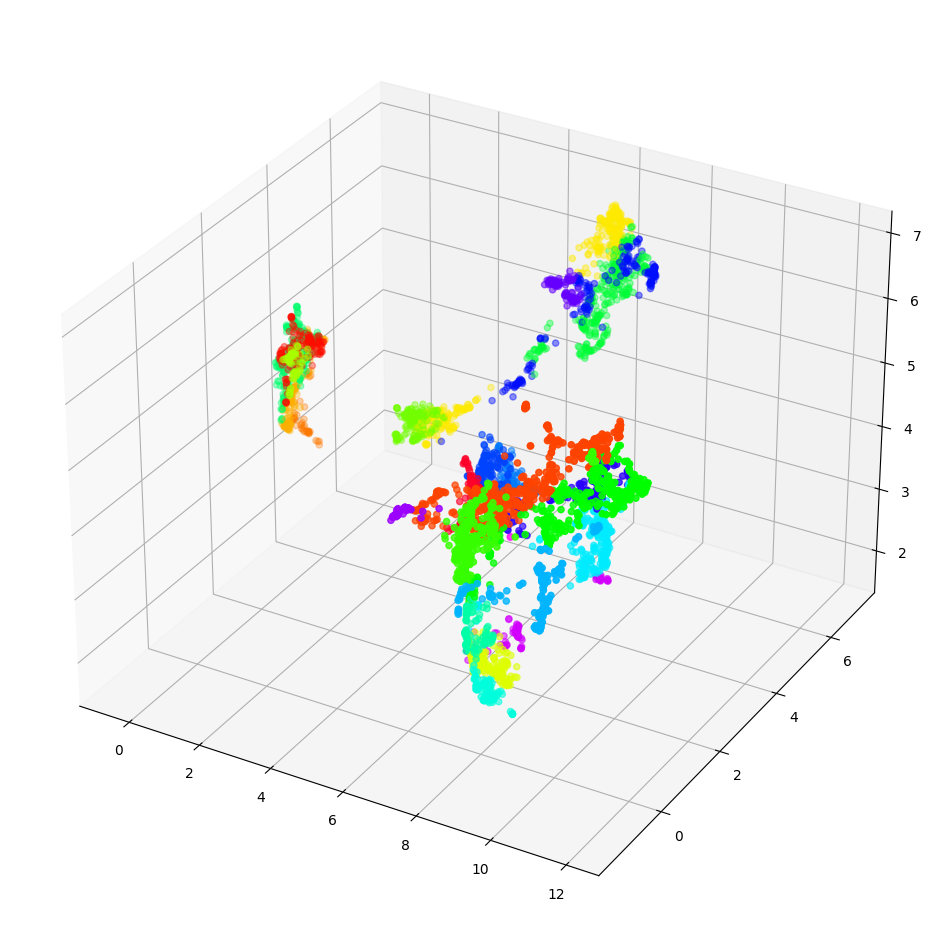

In [168]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(projection = '3d')
ax.scatter(emb_umaped[:,0],emb_umaped[:,1],emb_umaped[:,2], c = label_mapped, cmap = plt.get_cmap('gist_rainbow'))
plt.show()

In [276]:
from bertopic.vectorizers import ClassTfidfTransformer

ctfidf_model = ClassTfidfTransformer()#bm25_weighting=True)

In [ ]:
# from sklearn.feature_extraction.text import CountVectorizer
# vectorizer_model = CountVectorizer(ngram_range=(1, 3))

In [ ]:
# from bertopic.representation import MaximalMarginalRelevance
# representation_model = MaximalMarginalRelevance(diversity=0.1)

In [277]:
from bertopic import BERTopic
topic_model = BERTopic(embedding_model=model_bert, 
                       ctfidf_model = ctfidf_model,
                       umap_model=umap_model,
                       hdbscan_model = hdbscan_model,
                       language = 'russian', verbose = True)
# vectorizer_model = vectorizer_model,
#representation_model = representation_model, 

In [278]:
topics, probs = topic_model.fit_transform(strings_flat)

Batches:   0%|          | 0/140 [00:00<?, ?it/s]

2023-11-19 04:25:47,131 - BERTopic - Transformed documents to Embeddings
2023-11-19 04:25:57,718 - BERTopic - Reduced dimensionality
2023-11-19 04:25:58,928 - BERTopic - Clustered reduced embeddings


In [18]:
topic_model.visualize_heatmap()

In [19]:
topic_model.visualize_topics()

In [20]:
topic_model.get_topic_info()

Topic  Count                                               Name  \
0       0    557               0_ветеринарный_животное_врач_лечение   
1       1    377            1_культура_агроном_растение_выращивание   
2       2    328         2_машинист_тракторист_погрузчик_экскаватор   
3       3    325                 3_автомобиль_ремонт_механик_выпуск   
4       4    317               4_зоотехник_кормление_корм_поголовье   
5       5    295                    5_товар_клиент_продажа_торговый   
6       6    203                   6_ремонт_механик_техника_инженер   
7       7    192   7_продукция_производство_технологический_процесс   
8       8    191         8_система_монтаж_обслуживание_оборудование   
9       9    188               9_станок_ремонт_оборудование_наладка   
10     10    178              10_агроном_культура_зерновой_менеджер   
11     11    157         11_техника_оборудование_ремонт_технический   
12     12    154                  12_производство_продукция_цех_сыр   
13     13    130                   13_продажа_компания_рынок_клиент   
14     14    117               14_научный_анализ_написание_лаборант   
15     15    108          15_водитель_перевозка_экспедитор_доставка   
16     16    104  16_работа_производственный_выполнение_оборудов...   
17     17     91               17_охрана_безопасность_труд_проверка   
18     18     88       18_озеленение_растение_благоустройство_газон   
19     19     83            19_оборудование_ремонт_эксплуатация_цех   
20     20     79               20_хозяйство_директор_район_сельский   
21     21     63              21_документ_договор_учёт_материальный   
22     22     57                  22_монтаж_техника_wirtgen_потолок   
23     23     47               23_ветеринарный_санитарный_врач_мясо   
24     24     22                   24_командир_вооружить_сила_армия   

                                       Representation  \
0   [ветеринарный, животное, врач, лечение, меропр...   
1   [культура, агроном, растение, выращивание, удо...   
2   [машинист, тракторист, погрузчик, экскаватор, ...   
3   [автомобиль, ремонт, механик, выпуск, автотран...   
4   [зоотехник, кормление, корм, поголовье, рацион...   
5   [товар, клиент, продажа, торговый, менеджер, п...   
6   [ремонт, механик, техника, инженер, обслуживан...   
7   [продукция, производство, технологический, про...   
8   [система, монтаж, обслуживание, оборудование, ...   
9   [станок, ремонт, оборудование, наладка, слесар...   
10  [агроном, культура, зерновой, менеджер, главны...   
11  [техника, оборудование, ремонт, технический, ч...   
12  [производство, продукция, цех, сыр, качество, ...   
13  [продажа, компания, рынок, клиент, регион, мен...   
14  [научный, анализ, написание, лаборант, проведе...   
15  [водитель, перевозка, экспедитор, доставка, гр...   
16  [работа, производственный, выполнение, оборудо...   
17  [охрана, безопасность, труд, проверка, объект,...   
18  [озеленение, растение, благоустройство, газон,...   
19  [оборудование, ремонт, эксплуатация, цех, обсл...   
20  [хозяйство, директор, район, сельский, замести...   
21  [документ, договор, учёт, материальный, ценнос...   
22  [монтаж, техника, wirtgen, потолок, ресайклер,...   
23  [ветеринарный, санитарный, врач, мясо, оформле...   
24  [командир, вооружить, сила, армия, военный, сл...   

                                  Representative_Docs  
0   [молочный белгородский ферма ветеринарный врач...  
1   [конёк горбунок старший агроном изучение внедр...  
2   [умс машинист экскаватор машинист бульдозер ма...  
3   [снс группа компания зам директор транспорт ло...  
4   [ооофедоровское зоотехник контроль соблюдение ...  
5   [эст воронеж торговый представитель проведение...  
6   [сфера механик организация ремонт эксплуатация...  
7   [мкз технолог пищевой производство контроль ка...  
8   [реконструировать офисно гостиничный здание те...  
9   [авиаагрегат инженер механик наладчик ремонт с...  
10  [имя дзержинский агроном выполнение функция аг...  
11

In [284]:
docs_info = topic_model.get_document_info(strings_flat)

In [285]:
docs_info.groupby('Topic')

Document  Topic  \
0     вниисхм стажёр проведение эксперимент написани...     12   
1     урбан фарм агроном мониторинг состояние растен...      1   
2     kpmg москва стажёр работа отдел консультирован...      6   
3     ргау мсха тимирязев консультант приёмный комис...     21   
4     никольский директор совместительство штатный ч...     23   
...                                                 ...    ...   
4446  месяц менеджер туризм консультирование клиент ...      6   
4447  международный агентство социальный маркетингов...     12   
4448  агрофирма липецк главный зоотехник организация...      4   
4449  птицефабрика задонский старший зоотехник орган...      4   
4450  птицефабрика солидарность главный зоотехник за...      4   

                                                  Name  \
0             12_научный_анализ_семеноводство_лаборант   
1              1_культура_агроном_растение_выращивание   
2                   6_продажа_клиент_компания_менеджер   
3                   21_занятие_учебный_кафедра_студент   
4     23_директор_заместитель_деятельность_генеральный   
...                                                ...   
4446                6_продажа_клиент_компания_менеджер   
4447          12_научный_анализ_семеноводство_лаборант   
4448              4_зоотехник_кормление_корм_поголовье   
4449              4_зоотехник_кормление_корм_поголовье   
4450              4_зоотехник_кормление_корм_поголовье   

                                         Representation  \
0     [научный, анализ, семеноводство, лаборант, защ...   
1     [культура, агроном, растение, выращивание, удо...   
2     [продажа, клиент, компания, менеджер, рынок, т...   
3     [занятие, учебный, кафедра, студент, лаборатор...   
4     [директор, заместитель, деятельность, генераль...   
...                                                 ...   
4446  [продажа, клиент, компания, менеджер, рынок, т...   
4447  [научный, анализ, семеноводство, лаборант, защ...   
4448  [зоотехник, кормление, корм, поголовье, рацион...   
4449  [зоотехник, кормление, корм, поголовье, рацион...   
4450  [зоотехник, кормление, корм, поголовье, рацион...   

                                    Representative_Docs  \
0     [фгбну пензенский ниисх ведущий научный сотруд...   
1     [птицефабрика курский старший агроном изучение...   
2     [ферма ясногорья заместитель генеральный дирек...   
3     [башкирский государственный аграрный университ...   
4     [свинокомплекс восточно сибирский директор орг...   
...                                                 ...   
4446  [ферма ясногорья заместитель генеральный дирек...   
4447  [фгбну пензенский ниисх ведущий научный сотруд...   
4448  [интеграл агро главный зоотехник работа животн...   
4449  [интеграл агро главный зоотехник работа животн...   
4450  [интеграл агро главный зоотехник работа животн...   

                                            Top_n_words  \
0     научный - анализ - семеноводство - лаборант - ...   
1     культура - агроном - растение - выращивание - ...   
2     продажа - клиент - компания - менеджер - рынок...   
3     занятие - учебный - кафедра - студент - лабора...   
4     директор - заместитель - деятельность - генера...   
...                                                 ...   
4446  продажа - клиент - компания - менеджер - рынок...   
4447  научный - анализ - семеноводство - лаборант - ...   
4448  зоотехник - кормление - корм - поголовье - рац...   
4449  зоотехник - кормление - корм - поголовье - рац...   
4450  зоотехник - кормление - корм - поголовье - рац...   

      Representative_document  
0                       False  
1                       False  
2                       False  
3                       False  
4                       False  
...                       ...  
4446                    False  
4447                    False  
4448                    False  
4449                    False  
4450                    False  

[4451 rows x 7 columns]

In [282]:
# edge_matrix_np = edge_matrix.T.numpy()

# glob_id_to_loc

In [22]:
from scipy.cluster import hierarchy as sch
linkage_function = lambda x: sch.linkage(x, 'complete', optimal_ordering=True)
hierarchical_topics = topic_model.hierarchical_topics(strings_flat, linkage_function=linkage_function)

100%|██████████| 24/24 [00:00<00:00, 147.63it/s]


In [24]:
print(topic_model.get_topic_tree(hierarchical_topics))

.
├─ветеринарный_контроль_работа_животное_организация
│    ├─контроль_агроном_производство_культура_работа
│    │    ├─агроном_культура_растение_выращивание_защита
│    │    │    ├─агроном_культура_растение_выращивание_удобрение
│    │    │    │    ├─■──озеленение_растение_благоустройство_газон_уход ── Topic: 18
│    │    │    │    └─агроном_культура_растение_выращивание_удобрение
│    │    │    │         ├─■──культура_агроном_растение_выращивание_удобрение ── Topic: 1
│    │    │    │         └─■──агроном_культура_зерновой_менеджер_главный ── Topic: 10
│    │    │    └─■──научный_анализ_написание_лаборант_проведение ── Topic: 14
│    │    └─производство_контроль_продукция_процесс_зоотехник
│    │         ├─производство_контроль_продукция_процесс_качество
│    │         │    ├─продукция_производство_технологический_качество_контроль
│    │         │    │    ├─■──производство_продукция_цех_сыр_качество ── Topic: 12
│    │         │    │    └─■──продукция_производство_технологический_про

In [ ]:
from scipy.cluster import hierarchy as sch
linkaged = sch.linkage(emb_umaped, 'complete', optimal_ordering=True)
#.to_tree()

In [186]:
hierarchical_topics

Parent_ID                                        Parent_Name  \
23        48    работа_контроль_организация_ветеринарный_ремонт   
22        47  работа_контроль_организация_ветеринарный_прове...   
21        46     ветеринарный_врач_животное_лечение_мероприятие   
20        45    работа_контроль_организация_ремонт_оборудование   
19        44  машинист_водитель_тракторист_погрузчик_экскаватор   
18        43     ремонт_оборудование_работа_техника_технический   
17        42       агроном_культура_выращивание_контроль_работа   
16        41       агроном_культура_растение_выращивание_защита   
15        40    ремонт_оборудование_техника_обслуживание_работа   
14        39       агроном_культура_растение_выращивание_защита   
13        38  производственный_производство_работа_контроль_...   
12        37     зоотехник_кормление_корм_контроль_производство   
11        36  производственный_производство_работа_продукция...   
10        35  машинист_тракторист_погрузчик_экскаватор_погрузка   
9         34    ремонт_техника_механик_оборудование_технический   
8         33    система_оборудование_монтаж_обслуживание_ремонт   
7         32             продажа_клиент_товар_менеджер_компания   
6         31     ветеринарный_врач_животное_лечение_мероприятие   
5         30    агроном_культура_растение_выращивание_удобрение   
4         29        ремонт_техника_оборудование_механик_инженер   
3         28  производственный_производство_продукция_работа...   
2         27           агроном_культура_растение_удобрение_семя   
1         26      ремонт_оборудование_техника_технический_часть   
0         25     ветеринарный_врач_животное_лечение_мероприятие   

                                               Topics Child_Left_ID  \
23  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...            44   
22  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 13, 14, 15,...            45   
21                                 [0, 2, 13, 17, 22]            32   
20  [1, 3, 4, 5, 6, 7, 8, 9, 11, 14, 15, 16, 18, 1...            42   
19                                       [10, 12, 20]            35   
18                [4, 5, 6, 7, 9, 11, 16, 18, 19, 24]            38   
17                          [1, 3, 8, 14, 15, 21, 23]            41   
16                                 [3, 8, 14, 15, 23]            39   
15                               [4, 5, 7, 9, 11, 16]            34   
14                                     [3, 8, 14, 15]            15   
13                                    [6, 18, 19, 24]            19   
12                                            [1, 21]             1   
11                                        [6, 18, 24]            28   
10                                           [10, 12]            10   
9                                      [4, 5, 11, 16]            16   
8                                              [7, 9]             7   
7                                             [2, 17]            17   
6                                         [0, 13, 22]            22   
5                                          [3, 8, 14]            27   
4                                          [4, 5, 11]            26   
3                                             [6, 18]             6   
2                                              [3, 8]             3   
1                                             [4, 11]            11   
0                                             [0, 13]             0   

                                      Child_Left_Name Child_Right_ID  \
23  машинист_водитель_тракторист_погрузчик_экскаватор             47   
22    работа_контроль_организация_ремонт_оборудование             46   
21             продажа_клиент_товар_менеджер_компания             31   
20       агроном_культура_выращивание_контроль_работа             43   
19  машинист_тракторист_погрузчик_экскаватор_погрузка             20   
18  производственный_производство_работа_контроль_...             40   
17       агроном_культура_растение_выращивание_

In [109]:
hierarchical_topics

Parent_ID                                        Parent_Name  \
23        48    работа_контроль_организация_ветеринарный_ремонт   
22        47  работа_контроль_организация_ветеринарный_прове...   
21        46     ветеринарный_врач_животное_лечение_мероприятие   
20        45    работа_контроль_организация_ремонт_оборудование   
19        44  машинист_водитель_тракторист_погрузчик_экскаватор   
18        43     ремонт_оборудование_работа_техника_технический   
17        42       агроном_культура_выращивание_контроль_работа   
16        41       агроном_культура_растение_выращивание_защита   
15        40    ремонт_оборудование_техника_обслуживание_работа   
14        39       агроном_культура_растение_выращивание_защита   
13        38  производственный_производство_работа_контроль_...   
12        37     зоотехник_кормление_корм_контроль_производство   
11        36  производственный_производство_работа_продукция...   
10        35  машинист_тракторист_погрузчик_экскаватор_погрузка   
9         34    ремонт_техника_механик_оборудование_технический   
8         33    система_оборудование_монтаж_обслуживание_ремонт   
7         32             продажа_клиент_товар_менеджер_компания   
6         31     ветеринарный_врач_животное_лечение_мероприятие   
5         30    агроном_культура_растение_выращивание_удобрение   
4         29        ремонт_техника_оборудование_механик_инженер   
3         28  производственный_производство_продукция_работа...   
2         27           агроном_культура_растение_удобрение_семя   
1         26      ремонт_оборудование_техника_технический_часть   
0         25     ветеринарный_врач_животное_лечение_мероприятие   

                                               Topics Child_Left_ID  \
23  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...            44   
22  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 13, 14, 15,...            45   
21                                 [0, 2, 13, 17, 22]            32   
20  [1, 3, 4, 5, 6, 7, 8, 9, 11, 14, 15, 16, 18, 1...            42   
19                                       [10, 12, 20]            35   
18                [4, 5, 6, 7, 9, 11, 16, 18, 19, 24]            38   
17                          [1, 3, 8, 14, 15, 21, 23]            41   
16                                 [3, 8, 14, 15, 23]            39   
15                               [4, 5, 7, 9, 11, 16]            34   
14                                     [3, 8, 14, 15]            15   
13                                    [6, 18, 19, 24]            19   
12                                            [1, 21]             1   
11                                        [6, 18, 24]            28   
10                                           [10, 12]            10   
9                                      [4, 5, 11, 16]            16   
8                                              [7, 9]             7   
7                                             [2, 17]            17   
6                                         [0, 13, 22]            22   
5                                          [3, 8, 14]            27   
4                                          [4, 5, 11]            26   
3                                             [6, 18]             6   
2                                              [3, 8]             3   
1                                             [4, 11]            11   
0                                             [0, 13]             0   

                                      Child_Left_Name Child_Right_ID  \
23  машинист_водитель_тракторист_погрузчик_экскаватор             47   
22    работа_контроль_организация_ремонт_оборудование             46   
21             продажа_клиент_товар_менеджер_компания             31   
20       агроном_культура_выращивание_контроль_работа             43   
19  машинист_тракторист_погрузчик_экскаватор_погрузка             20   
18  производственный_производство_работа_контроль_...             40   
17       агроном_культура_растение_выращивание_

In [108]:
topic_model.visualize_hierarchy(hierarchical_topics=hierarchical_topics)

In [112]:
topic_distr, topic_token_distr = topic_model.approximate_distribution(strings_flat, calculate_tokens=True)

# Visualize the token-level distributions
df = topic_model.visualize_approximate_distribution(strings_flat[1], topic_token_distr[1])
df

100%|██████████| 5/5 [00:02<00:00,  1.93it/s]


In [7]:
embeddings = model_bert.encode(strings_flat)

Batches:   0%|          | 0/140 [00:00<?, ?it/s]

In [176]:
topic_model.visualize_documents(strings_flat, embeddings=embeddings)

In [171]:
topic_model.visualize_documents(strings_flat, embeddings=embeddings)

In [158]:
topic_model.visualize_documents(strings_flat, embeddings=embeddings)

In [111]:
topic_model.visualize_documents(strings_flat, embeddings=embeddings) #umap - 128, skibidi - default

In [122]:
# data_df = pd.DataFrame(strings_dict).melt().dropna().rename(columns={'variable':'batch_id'}).reset_index(drop = True)

In [128]:
data_df = pd.DataFrame(strings_dict)

In [131]:
adaj_matr = np.zeros((len(data_df), len(data_df)))

In [135]:
data_df.groupby('resume_id', as_index=False)

In [107]:
len(sorted(strings_, key=lambda x: len(x), reverse = True)[0])

21

In [9]:
len(strings_flat)

4451

In [125]:
strings_dict = {'resume_id':[],'rab_id':[], 'rab':[]}
for i, batch in enumerate(strings_):
    for j, rab in enumerate(batch):
        strings_dict['resume_id'].append(i)
        strings_dict['rab_id'].append(j)
        strings_dict['rab'].append(rab)

In [11]:
import numpy as np

In [28]:
len(embeddings)

4451

In [31]:
len(strings_)

1001

In [34]:
for i in range(1,2):
    print(i)

1


In [71]:
len(strings_flat)

4451

In [51]:
len(embeddings)

4451

In [81]:
len(embeddings)

4451

In [419]:
strings_flat[27]

'измайловский совхоз декоративный садоводство тракторист разработка грунт распашка почва погрузочный работа обслуживание техника'

In [ ]:
strings

In [468]:
adaj_matr = np.zeros((len(strings_flat), len(strings_flat)))
x = []
y = []
glob_id_to_loc = dict.fromkeys(list(range(len(strings_flat))), -1)



glob_id = 0
true_indx = 0
for batches in strings_:
    if len(batches) > 1:
        for rab in range(len(batches) - 1):            
            adaj_matr[glob_id, glob_id+1] = 1
            adaj_matr[glob_id+1, glob_id] = 1
            glob_id_to_loc[glob_id] = true_indx
            x.append(embeddings[glob_id])
            y.append(embeddings[glob_id + 1])
            glob_id+=1
            true_indx+=1
        glob_id_to_loc[glob_id] = true_indx
        if (glob_id + 1) < len(strings_flat):
            x.append(embeddings[glob_id])
            y.append(embeddings[glob_id + 1])
#     else:
#         true_indx+=1
#         print(batches)
#         print(strings_flat[glob_id])
    glob_id+=1
        
    










# for batch in range(len(strings_)-1):
#     if len(strings_[batch]) > 1:
#         loc_c = 0
#         for rab_i in range(len(strings_[batch]) - 1):
#             adaj_matr[true_indx, true_indx + 1] = 1
#             adaj_matr[true_indx + 1, true_indx] = 1
#             x.append(embeddings[glob_id+loc_c])
#             y.append(embeddings[glob_id+loc_c + 1])
#             glob_id_to_loc[glob_id+loc_c] = true_indx
#             loc_c+=1
#             true_indx+=1
#     glob_id+=len(strings_[batch])
            
#     glob_id+=1

In [438]:
len(strings_flat)

4451

In [463]:
sum(0 if len(i) > 1 else 1 for i in strings_)

183

In [469]:
len(x), len(y)

(4267, 4267)

In [470]:
4267+183

4450

In [472]:
max(list(glob_id_to_loc.keys())), max(list(glob_id_to_loc.values()))

(4450, 3450)

In [436]:
strings_[0]

['вниисхм стажёр проведение эксперимент написание отчёт составление нормативный документ статистический анализ результат эксперимент',
 'урбан фарм агроном мониторинг состояние растение корректировка условие выращивание мониторинг контроль работа технологический оборудование наблюдение основный параметр вертикальный ферма влиять урожай контроль соблюдение агротехнический мероприятие посев посадка уход растение сбор урожай вертикальный ферма',
 'kpmg москва стажёр работа отдел консультирование управление риск',
 'ргау мсха тимирязев консультант приёмный комиссия консультирование абитуриент']

In [439]:
glob_id

4451

In [440]:
edge_matrix = torch.tensor(adaj_matr).nonzero().t().contiguous()

In [442]:
edge_matrix

tensor([[   0,    1,    1,  ..., 4449, 4449, 4450],
        [   1,    0,    2,  ..., 4448, 4450, 4449]])

In [441]:
edge_matrix[:, :30]

tensor([[ 0,  1,  1,  2,  2,  3,  4,  5,  5,  6,  6,  7,  7,  8,  8,  9,  9, 10,
         12, 13, 13, 14, 14, 15, 15, 16, 16, 17, 17, 18],
        [ 1,  0,  2,  1,  3,  2,  5,  4,  6,  5,  7,  6,  8,  7,  9,  8, 10,  9,
         13, 12, 14, 13, 15, 14, 16, 15, 17, 16, 18, 17]])

In [365]:
loc_id_to_glob = dict((v,k) for k,v in glob_id_to_loc.items())

In [367]:
max(list(loc_id_to_glob.keys()))

3447

In [364]:
edge_matrix

tensor([[   0,    1,    1,  ..., 3447, 3447, 3448],
        [   1,    0,    2,  ..., 3446, 3448, 3447]])

In [140]:
len(strings_flat)

4451

In [93]:
len(y), len(x), adaj_matr.shape

(3450, 3450, (4451, 4451))

In [147]:
# !git clone https://github.com/qiaoyu-tan/S2GAE.git

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Cloning into 'S2GAE'...
remote: Enumerating objects: 242, done.
remote: Counting objects: 100% (242/242), done.
remote: Compressing objects: 100% (161/161), done.
remote: Total 242 (delta 86), reused 201 (delta 65), pack-reused 0
Receiving objects: 100% (242/242), 4.98 MiB | 20.39 MiB/s, done.
Resolving deltas: 100% (86/86), done.


In [148]:
# cd S2GAE

/kaggle/working/S2GAE


In [2]:
!git clone https://github.com/EdisonLeeeee/MaskGAE.git

Cloning into 'MaskGAE'...
remote: Enumerating objects: 123, done.
remote: Counting objects: 100% (123/123), done.
remote: Compressing objects: 100% (56/56), done.
remote: Total 123 (delta 72), reused 113 (delta 67), pack-reused 0
Receiving objects: 100% (123/123), 3.14 MiB | 40.13 MiB/s, done.
Resolving deltas: 100% (72/72), done.


In [3]:
cd MaskGAE

/kaggle/working/MaskGAE


In [4]:
!pip install ogb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.8/78.8 kB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7028 sha256=b34a140ec7a12e7468880dd63b5261deb6e89b2bee5645e91fe70c698eebf277
  Stored in directory: /root/.cache/pip/wheels/3d/fe/b0/27a9892da57472e538c7452a721a9cf463cc03cf7379889266
Successfully built littleutils


In [5]:
!pip install /kaggle/input/compiled-libs/torch_cluster-1.6.3-cp310-cp310-linux_x86_64.whl

Processing /kaggle/input/compiled-libs/torch_cluster-1.6.3-cp310-cp310-linux_x86_64.whl


In [6]:
!pip install torch_geometric

  Obtaining dependency information for torch_geometric from https://files.pythonhosted.org/packages/65/4e/6f9a75548a93fedcd4514ae2de9bee1e91bade6b73252b4da32f0e42ac52/torch_geometric-2.4.0-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.9/63.9 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 23.9 MB/s eta 0:00:0000:01


In [7]:
!pip install /kaggle/input/compiled-libs/torch_scatter-2.1.2-cp310-cp310-linux_x86_64.whl

Processing /kaggle/input/compiled-libs/torch_scatter-2.1.2-cp310-cp310-linux_x86_64.whl


In [8]:
!pip install /kaggle/input/compiled-libs/torch_sparse-0.6.18-cp310-cp310-linux_x86_64.whl

Processing /kaggle/input/compiled-libs/torch_sparse-0.6.18-cp310-cp310-linux_x86_64.whl


In [9]:
!pip install texttable

In [9]:
# import torch

In [98]:
# edge_matrix = torch.tensor(adaj_matr).nonzero().t().contiguous()
# X = torch.tensor(x)
# y = torch.tensor(y)

/tmp/ipykernel_47/3585844729.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y)


In [99]:
# torch.save([X, y, edge_matrix], 'train_data_no_place_04_fixed_TRUE.pt')

In [10]:
import torch

In [180]:
X, y, edge_matrix = torch.load('/kaggle/input/ilovebutter/train_data_no_place_04_fixed_TRUE.pt')

In [36]:
# x = torch.Tensor(x)

/tmp/ipykernel_47/962617325.py:1: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /usr/local/src/pytorch/torch/csrc/utils/tensor_new.cpp:245.)
  x = torch.Tensor(x)


In [11]:
# edge_matrix[:, :-2].type(torch.long)

tensor([[   0,    1,    1,  ..., 3448, 3448, 3449],
        [   1,    0,    2,  ..., 3447, 3449, 3448]])

In [136]:
# X.shape

torch.Size([3450, 312])

In [181]:
from torch_geometric.data import Data

data_graph = Data(x=X.float(),
                edge_index=edge_matrix[:, :-2].long(),
                y=y.float())

In [13]:
%%writefile /kaggle/working/MaskGAE/maskgae/utils.py
import sys
import os
import torch
import random
import numpy as np
from texttable import Texttable
import torch_geometric.transforms as T
from torch_geometric.datasets import Amazon, Coauthor, Planetoid, Reddit
from torch_geometric.data import Data
from torch_geometric.utils import index_to_mask

def set_seed(seed: int):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed) # if you are using multi-GPU.
    torch.backends.cudnn.benchmark = False
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.enabled = False

def get_dataset(root: str, name: str, transform=None, data = None) -> Data:
    if name in {'arxiv', 'products', 'mag'}:
        from ogb.nodeproppred import PygNodePropPredDataset
        print('loading ogb dataset...')
        dataset = PygNodePropPredDataset(root=root, name=f'ogbn-{name}')
        if name in ['mag']:
            rel_data = dataset[0]
            # We are only interested in paper <-> paper relations.
            data = Data(
                    x=rel_data.x_dict['paper'],
                    edge_index=rel_data.edge_index_dict[('paper', 'cites', 'paper')],
                    y=rel_data.y_dict['paper'])
            data = transform(data)
            split_idx = dataset.get_idx_split()
            data.train_mask = index_to_mask(split_idx['train']['paper'], data.num_nodes)
            data.val_mask = index_to_mask(split_idx['valid']['paper'], data.num_nodes)
            data.test_mask = index_to_mask(split_idx['test']['paper'], data.num_nodes)
        else:
            data = transform(dataset[0])
            split_idx = dataset.get_idx_split()
            data.train_mask = index_to_mask(split_idx['train'], data.num_nodes)
            data.val_mask = index_to_mask(split_idx['valid'], data.num_nodes)
            data.test_mask = index_to_mask(split_idx['test'], data.num_nodes)

    elif name in {'Cora', 'Citeseer', 'Pubmed'}:
        dataset = Planetoid(root, name)
        data = transform(dataset[0])

    elif name == 'Reddit':
        dataset = Reddit(osp.join(root, name))
        data = transform(dataset[0])
    elif name in {'Photo', 'Computers'}:
        dataset = Amazon(root, name)
        data = transform(dataset[0])
        data = T.RandomNodeSplit(num_val=0.1, num_test=0.8)(data)
    elif name in {'CS', 'Physics'}:
        dataset = Coauthor(root, name)
        data = transform(dataset[0])
        data = T.RandomNodeSplit(num_val=0.1, num_test=0.8)(data)
    elif name in {'mine-dataset'}:
        data = data
    else:
        raise ValueError(name)
    return data
    
def tab_printer(args):
    """Function to print the logs in a nice tabular format.

    Note
    ----
    Package `Texttable` is required.
    Run `pip install Texttable` if was not installed.

    Parameters
    ----------
    args: Parameters used for the model.
    """
    args = vars(args)
    keys = sorted(args.keys())
    t = Texttable()
    t.add_rows([["Parameter", "Value"]] + [[k, str(args[k])] for k in keys if not k.startswith('__')])
    return t.draw()

Overwriting /kaggle/working/MaskGAE/maskgae/utils.py


In [255]:
conf = {
    "mask":'Edge',#'Path', #Edge
    "bn":True,
    "layer":'gcn',
    "encoder_activation":'elu',
    "encoder_channels":128,
    "hidden_channels":128,
    "decoder_channels":64,
    "encoder_layers":2,
    "decoder_layers":2,
    "encoder_dropout":0.5,
    "decoder_dropout":0.2,
    "alpha":2e-3,
    "lr":1e-3,
    "weight_decay":5e-5,
    "grad_norm":1.0,
    "batch_size":128,
    "start":'edge',
    "p":0.7,
    "epochs":500,
    "runs":10,
    "eval_period":1,
    "save_path":'MaskGAE-LinkPred3_edge.pt',
    "device":0,
    "seed":42
}

In [256]:
class Conf:
    def __init__(self, **entries):
        self.__dict__.update(entries)

In [257]:
conf_ = Conf(**conf)

In [185]:
%%writefile /kaggle/working/MaskGAE/maskgae/model.py
import torch
import torch.nn.functional as F
import torch.nn as nn
from torch_geometric.nn import (
    Linear,
    GCNConv,
    SAGEConv,
    GATConv,
    GINConv,
    GATv2Conv,
    global_add_pool,
    global_mean_pool,
    global_max_pool
)

from torch_geometric.utils import add_self_loops, negative_sampling, degree
from torch_sparse import SparseTensor
from torch.utils.data import DataLoader
from sklearn.metrics import roc_auc_score, average_precision_score

# custom modules
from maskgae.loss import info_nce_loss, ce_loss, log_rank_loss, hinge_auc_loss, auc_loss


def to_sparse_tensor(edge_index, num_nodes):
    return SparseTensor.from_edge_index(
        edge_index, sparse_sizes=(num_nodes, num_nodes)
    ).to(edge_index.device)


def creat_gnn_layer(name, first_channels, second_channels, heads):
    if name == "sage":
        layer = SAGEConv(first_channels, second_channels)
    elif name == "gcn":
        layer = GCNConv(first_channels, second_channels)
    elif name == "gin":
        layer = GINConv(Linear(first_channels, second_channels), train_eps=True)
    elif name == "gat":
        layer = GATConv(-1, second_channels, heads=heads)
    elif name == "gat2":
        layer = GATv2Conv(-1, second_channels, heads=heads)
    else:
        raise ValueError(name)
    return layer


def create_input_layer(num_nodes, num_node_feats,
                       use_node_feats=True, node_emb=None):
    emb = None
    if use_node_feats:
        input_dim = num_node_feats
        if node_emb:
            emb = torch.nn.Embedding(num_nodes, node_emb)
            input_dim += node_emb
    else:
        emb = torch.nn.Embedding(num_nodes, node_emb)
        input_dim = node_emb
    return input_dim, emb


def creat_activation_layer(activation):
    if activation is None:
        return nn.Identity()
    elif activation == "relu":
        return nn.ReLU()
    elif activation == "elu":
        return nn.ELU()
    else:
        raise ValueError("Unknown activation")


class GNNEncoder(nn.Module):
    def __init__(
        self,
        in_channels,
        hidden_channels,
        out_channels,
        num_layers=2,
        dropout=0.5,
        bn=False,
        layer="gcn",
        activation="elu",
        use_node_feats=True,
        num_nodes=None,
        node_emb=None,
    ):

        super().__init__()
        self.convs = nn.ModuleList()
        self.bns = nn.ModuleList()
        bn = nn.BatchNorm1d if bn else nn.Identity
        self.use_node_feats = use_node_feats
        self.node_emb = node_emb

        if node_emb is not None and num_nodes is None:
            raise RuntimeError("Please provide the argument `num_nodes`.")

        in_channels, self.emb = create_input_layer(
            num_nodes, in_channels, use_node_feats=use_node_feats, node_emb=node_emb
        )
        for i in range(num_layers):
            first_channels = in_channels if i == 0 else hidden_channels
            second_channels = out_channels if i == num_layers - 1 else hidden_channels
            heads = 1 if i == num_layers - 1 or 'gat' not in layer else 4

            self.convs.append(creat_gnn_layer(layer, first_channels, second_channels, heads))
            self.bns.append(bn(second_channels*heads))

        self.dropout = nn.Dropout(dropout)
        self.activation = creat_activation_layer(activation)

    def reset_parameters(self):
        for conv in self.convs:
            conv.reset_parameters()

        for bn in self.bns:
            if not isinstance(bn, nn.Identity):
                bn.reset_parameters()

        if self.emb is not None:
            nn.init.xavier_uniform_(self.emb.weight)

    def create_input_feat(self, x):
        if self.use_node_feats:
            input_feat = x
            if self.node_emb:
                input_feat = torch.cat([self.emb.weight, input_feat], dim=-1)
        else:
            input_feat = self.emb.weight
        return input_feat

    def forward(self, x, edge_index):
        x = self.create_input_feat(x)
        edge_index = to_sparse_tensor(edge_index, x.size(0))

        for i, conv in enumerate(self.convs[:-1]):
            x = self.dropout(x)
            x = conv(x = x, edge_index = edge_index)
            x = self.bns[i](x)
            x = self.activation(x)
        x = self.dropout(x)
        x = self.convs[-1](x, edge_index)
        x = self.bns[-1](x)
        x = self.activation(x)
        return x

    @torch.no_grad()
    def get_embedding(self, x, edge_index, mode="cat"):

        self.eval()
        assert mode in {"cat", "last"}, mode

        x = self.create_input_feat(x)
        edge_index = to_sparse_tensor(edge_index, x.size(0))
        out = []
        for i, conv in enumerate(self.convs[:-1]):
            x = self.dropout(x)
            x = conv(x, edge_index)
            x = self.bns[i](x)
            x = self.activation(x)
            out.append(x)
        x = self.dropout(x)
        x = self.convs[-1](x, edge_index)
        x = self.bns[-1](x)
        x = self.activation(x)
        out.append(x)

        if mode == "cat":
            embedding = torch.cat(out, dim=1)
        else:
            embedding = out[-1]

        return embedding


class DotEdgeDecoder(nn.Module):
    """Simple Dot Product Edge Decoder"""

    def __init__(self, *args, **kwargs):
        super().__init__()

    def reset_parameters(self):
        return

    def forward(self, z, edge, sigmoid=True):
        x = z[edge[0]] * z[edge[1]]
        x = x.sum(-1)

        if sigmoid:
            return x.sigmoid()
        else:
            return x


class EdgeDecoder(nn.Module):
    """Simple MLP Edge Decoder"""

    def __init__(
        self, in_channels, hidden_channels, out_channels=1,
        num_layers=2, dropout=0.5, activation='relu'
    ):

        super().__init__()
        self.mlps = nn.ModuleList()

        for i in range(num_layers):
            first_channels = in_channels if i == 0 else hidden_channels
            second_channels = out_channels if i == num_layers - 1 else hidden_channels
            self.mlps.append(nn.Linear(first_channels, second_channels))

        self.dropout = nn.Dropout(dropout)
        self.activation = creat_activation_layer(activation)

    def reset_parameters(self):
        for mlp in self.mlps:
            mlp.reset_parameters()

    def forward(self, z, edge, sigmoid=True, reduction=False):
        x = z[edge[0]] * z[edge[1]]

        if reduction:
            x = x.mean(1)

        for i, mlp in enumerate(self.mlps[:-1]):
            x = self.dropout(x)
            x = mlp(x)
            x = self.activation(x)

        x = self.mlps[-1](x)

        if sigmoid:
            return x.sigmoid()
        else:
            return x


class DegreeDecoder(nn.Module):
    """Simple MLP Degree Decoder"""

    def __init__(
        self, in_channels, hidden_channels, out_channels=1,
        num_layers=2, dropout=0.5, activation='relu',
    ):

        super().__init__()
        self.mlps = nn.ModuleList()

        for i in range(num_layers):
            first_channels = in_channels if i == 0 else hidden_channels
            second_channels = out_channels if i == num_layers - 1 else hidden_channels
            self.mlps.append(nn.Linear(first_channels, second_channels))

        self.dropout = nn.Dropout(dropout)
        self.activation = creat_activation_layer(activation)

    def reset_parameters(self):
        for mlp in self.mlps:
            mlp.reset_parameters()

    def forward(self, x):

        for i, mlp in enumerate(self.mlps[:-1]):
            x = mlp(x)
            x = self.dropout(x)
            x = self.activation(x)

        x = self.mlps[-1](x)
        x = self.activation(x)

        return x


def random_negative_sampler(edge_index, num_nodes, num_neg_samples):
    neg_edges = torch.randint(0, num_nodes, size=(2, num_neg_samples)).to(edge_index)
    return neg_edges


class MaskGAE(nn.Module):
    def __init__(
        self,
        encoder,
        edge_decoder,
        degree_decoder=None,
        mask=None,
        random_negative_sampling=False,
        loss="ce",
    ):
        super().__init__()
        self.encoder = encoder
        self.edge_decoder = edge_decoder
        self.degree_decoder = degree_decoder
        self.mask = mask

        if loss == "ce":
            self.loss_fn = ce_loss
        elif loss == "auc":
            self.loss_fn = auc_loss
        elif loss == "info_nce":
            self.loss_fn = info_nce_loss
        elif loss == "log_rank":
            self.loss_fn = log_rank_loss
        elif loss == "hinge_auc":
            self.loss_fn = hinge_auc_loss
        else:
            raise ValueError(loss)

        if random_negative_sampling:
            # this will be faster than pyg negative_sampling
            self.negative_sampler = random_negative_sampler
        else:
            self.negative_sampler = negative_sampling

    def reset_parameters(self):
        self.encoder.reset_parameters()
        self.edge_decoder.reset_parameters()

        if self.degree_decoder is not None:
            self.degree_decoder.reset_parameters()

    def forward(self, x, edge_index):
        return self.encoder(x, edge_index)

    def train_step(self, data, optimizer, alpha=0.002,
        batch_size=2 ** 16, grad_norm=1.0
    ):
        self.train()

        x, edge_index = data.x, data.edge_index

        if self.mask is not None:
            # MaskGAE
            remaining_edges, masked_edges = self.mask(edge_index)
        else:
            # Plain GAE
            remaining_edges = edge_index
            masked_edges = getattr(data, "pos_edge_label_index", edge_index)

        loss_total = 0.0
        aug_edge_index, _ = add_self_loops(edge_index)
        neg_edges = self.negative_sampler(
            aug_edge_index,
            num_nodes=data.num_nodes,
            num_neg_samples=masked_edges.view(2, -1).size(1),
        ).view_as(masked_edges)

        for perm in DataLoader(
            range(masked_edges.size(1)), batch_size=batch_size, shuffle=True
        ):

            optimizer.zero_grad()

            z = self.encoder(x, remaining_edges)

            batch_masked_edges = masked_edges[:, perm]
            batch_neg_edges = neg_edges[:, perm]

            # ******************* loss for edge reconstruction *********************
            pos_out = self.edge_decoder(
                z, batch_masked_edges, sigmoid=False
            )
            neg_out = self.edge_decoder(z, batch_neg_edges, sigmoid=False)
            loss = self.loss_fn(pos_out, neg_out)
            # **********************************************************************

            # ******************* loss for degree prediction ***********************
            if self.degree_decoder is not None and alpha:
                deg = degree(masked_edges[1].flatten(), data.num_nodes).float()
                loss += alpha * F.mse_loss(self.degree_decoder(z).squeeze(), deg)
            # **********************************************************************

            loss.backward()

            if grad_norm > 0:
                # gradient clipping
                nn.utils.clip_grad_norm_(self.parameters(), grad_norm)

            optimizer.step()

            loss_total += loss.item()

        return loss_total

    @torch.no_grad()
    def batch_predict(self, z, edges, batch_size=2 ** 16):
        preds = []
        for perm in DataLoader(range(edges.size(1)), batch_size):
            edge = edges[:, perm]
            preds += [self.edge_decoder(z, edge).squeeze().cpu()]
        pred = torch.cat(preds, dim=0)
        return pred

    @torch.no_grad()
    def test_step(self, data, pos_edge_index, neg_edge_index, batch_size=2**16):
        self.eval()
        z = self(data.x, data.edge_index)
        pos_pred = self.batch_predict(z, pos_edge_index)
        neg_pred = self.batch_predict(z, neg_edge_index)

        pred = torch.cat([pos_pred, neg_pred], dim=0)
        pos_y = pos_pred.new_ones(pos_pred.size(0))
        neg_y = neg_pred.new_zeros(neg_pred.size(0))

        y = torch.cat([pos_y, neg_y], dim=0)
        y, pred = y.cpu().numpy(), pred.cpu().numpy()

        return roc_auc_score(y, pred), average_precision_score(y, pred)

    @torch.no_grad()
    def test_step_ogb(self, data, evaluator, 
                      pos_edge_index, neg_edge_index, batch_size=2**16):
        self.eval()
        z = self(data.x, data.edge_index)
        pos_pred = self.batch_predict(z, pos_edge_index)
        neg_pred = self.batch_predict(z, neg_edge_index)

        results = {}
        for K in [20, 50, 100]:
            evaluator.K = K
            hits = evaluator.eval(
                {"y_pred_pos": pos_pred, "y_pred_neg": neg_pred, }
            )[f"hits@{K}"]
            results[f"Hits@{K}"] = hits

        return results


Overwriting /kaggle/working/MaskGAE/maskgae/model.py


In [144]:
# import importlib
# import maskgae
# importlib.reload(maskgae.model)
# importlib.reload(maskgae)

<module 'maskgae' (<_frozen_importlib_external._NamespaceLoader object at 0x7e28284e69b0>)>

In [258]:
import numpy as np

import torch
import torch_geometric.transforms as T
from tqdm.auto import tqdm

from maskgae.utils import set_seed, tab_printer, get_dataset
from maskgae.model import MaskGAE, DegreeDecoder, EdgeDecoder, GNNEncoder, DotEdgeDecoder
from maskgae.mask import MaskEdge, MaskPath


def train_linkpred(model, splits, args, device="cuda:0"):
    optimizer = torch.optim.Adam(model.parameters(),
                                 lr=args.lr,
                                 weight_decay=args.weight_decay)

    best_valid = 0
    batch_size = args.batch_size
    
    train_data = splits['train'].to(device)
    valid_data = splits['valid'].to(device)
    test_data = splits['test'].to(device)
    
    for epoch in tqdm(range(1, 1 + args.epochs)):

        loss = model.train_step(train_data, optimizer,
                                alpha=args.alpha, 
                                batch_size=args.batch_size)
        
        if epoch % args.eval_period == 0:
            valid_auc, valid_ap = model.test_step(valid_data, 
                                                  valid_data.pos_edge_label_index, 
                                                  valid_data.neg_edge_label_index, 
                                                  batch_size=batch_size)
            if valid_auc > best_valid:
                best_valid = valid_auc
                best_epoch = epoch
            torch.save(model.state_dict(), args.save_path)

    model.load_state_dict(torch.load(args.save_path))
    test_auc, test_ap = model.test_step(test_data, 
                                        test_data.pos_edge_label_index, 
                                        test_data.neg_edge_label_index, 
                                        batch_size=batch_size)   
    return test_auc, test_ap

args = conf_
# parser = argparse.ArgumentParser()
# parser.add_argument("--dataset", nargs="?", default="Cora", help="Datasets. (default: Cora)")
# parser.add_argument("--mask", nargs="?", default="Path", help="Masking stractegy, `Path`, `Edge` or `None` (default: Path)")
# parser.add_argument('--seed', type=int, default=42, help='Random seed for model and dataset. (default: 2022)')

# parser.add_argument('--bn', action='store_true', help='Whether to use batch normalization for GNN encoder. (default: False)')
# parser.add_argument("--layer", nargs="?", default="gcn", help="GNN layer, (default: gcn)")
# parser.add_argument("--encoder_activation", nargs="?", default="elu", help="Activation function for GNN encoder, (default: elu)")
# parser.add_argument('--encoder_channels', type=int, default=128, help='Channels of GNN encoder. (default: 128)')
# parser.add_argument('--hidden_channels', type=int, default=128, help='Channels of hidden representation. (default: 128)')
# parser.add_argument('--decoder_channels', type=int, default=64, help='Channels of decoder. (default: 64)')
# parser.add_argument('--encoder_layers', type=int, default=1, help='Number of layers of encoder. (default: 1)')
# parser.add_argument('--decoder_layers', type=int, default=2, help='Number of layers for decoders. (default: 2)')
# parser.add_argument('--encoder_dropout', type=float, default=0.8, help='Dropout probability of encoder. (default: 0.7)')
# parser.add_argument('--decoder_dropout', type=float, default=0.2, help='Dropout probability of decoder. (default: 0.3)')
# parser.add_argument('--alpha', type=float, default=0.003, help='loss weight for degree prediction. (default: 2e-3)')

# parser.add_argument('--lr', type=float, default=1e-2, help='Learning rate for training. (default: 1e-2)')
# parser.add_argument('--weight_decay', type=float, default=5e-5, help='weight_decay for training. (default: 5e-5)')
# parser.add_argument('--grad_norm', type=float, default=1.0, help='grad_norm for training. (default: 1.0.)')
# parser.add_argument('--batch_size', type=int, default=2**16, help='Number of batch size. (default: 2**16)')

# parser.add_argument("--start", nargs="?", default="edge", help="Which Type to sample starting nodes for random walks, (default: edge)")
# parser.add_argument('--p', type=float, default=0.7, help='Mask ratio or sample ratio for MaskEdge/MaskPath')

# parser.add_argument('--epochs', type=int, default=500, help='Number of training epochs. (default: 300)')
# parser.add_argument('--runs', type=int, default=10, help='Number of runs. (default: 10)')
# parser.add_argument('--eval_period', type=int, default=10, help='(default: 10)')
# parser.add_argument("--save_path", nargs="?", default="MaskGAE-LinkPred.pt", help="save path for model. (default: MaskGAE-LinkPred.pt)")
# parser.add_argument("--device", type=int, default=0)


# try:
#     args = parser.parse_args()
#     print(tab_printer(args))
# except:
#     parser.print_help()
#     exit(0)


set_seed(args.seed)
if args.device < 0:
    device = "cpu"
else:
    device = f"cuda:{args.device}" if torch.cuda.is_available() else "cpu"

    
# device = "cpu"
    
transform = T.Compose([
    T.ToUndirected(),
    T.ToDevice(device),
])


# (!IMPORTANT) Specify the path to your dataset directory ##############
# root = '~/public_data/pyg_data' # my root directory
root = 'data/'
########################################################################

data = get_dataset('', 'mine-dataset', transform=transform, data=data_graph)

train_data, val_data, test_data = T.RandomLinkSplit(num_val=0.05, num_test=0.1,
                                                    is_undirected=True,
                                                    split_labels=True,
                                                    add_negative_train_samples=False)(data)

splits = dict(train=train_data, valid=val_data, test=test_data)

if args.mask == 'Path':
    mask = MaskPath(p=args.p, num_nodes=data.num_nodes, 
                    start=args.start,
                    walk_length=args.encoder_layers+1)
elif args.mask == 'Edge':
    mask = MaskEdge(p=args.p)
else:
    mask = None # vanilla GAE

encoder = GNNEncoder(data.num_features, args.encoder_channels, args.hidden_channels,
                     num_layers=args.encoder_layers, dropout=args.encoder_dropout,
                     bn=args.bn, layer=args.layer, activation=args.encoder_activation)

if args.decoder_layers == 0:
    edge_decoder = DotEdgeDecoder()
else:
    edge_decoder = EdgeDecoder(args.hidden_channels, args.decoder_channels,
                               num_layers=args.decoder_layers, dropout=args.decoder_dropout)

degree_decoder = DegreeDecoder(args.hidden_channels, args.decoder_channels,
                               num_layers=args.decoder_layers, dropout=args.decoder_dropout)


# model = MaskGAE(encoder, edge_decoder, degree_decoder, mask).to(device)

auc_results = []
ap_results = []

for run in range(1, args.runs+1):
    test_auc, test_ap = train_linkpred(model, splits, args, device=device)
    auc_results.append(test_auc)
    ap_results.append(test_ap)
    print(f'Runs {run} - AUC: {test_auc:.2%}', f'AP: {test_ap:.2%}')    

print(f'Link Prediction Results ({args.runs} runs):\n'
      f'AUC: {np.mean(auc_results):.2%} ± {np.std(auc_results):.2%}',
      f'AP: {np.mean(ap_results):.2%} ± {np.std(ap_results):.2%}',
     )

  0%|          | 0/500 [00:00<?, ?it/s]

Runs 1 - AUC: 78.83% AP: 80.09%


  0%|          | 0/500 [00:00<?, ?it/s]

Runs 2 - AUC: 78.98% AP: 80.75%


  0%|          | 0/500 [00:00<?, ?it/s]

Runs 3 - AUC: 78.29% AP: 80.18%


  0%|          | 0/500 [00:00<?, ?it/s]

Runs 4 - AUC: 78.59% AP: 80.43%


  0%|          | 0/500 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [31]:
data_test = data.to(device)

In [30]:
data.edge_index

tensor([[   0,    1,    1,  ..., 3448, 3448, 3449],
        [   1,    0,    2,  ..., 3447, 3449, 3448]])

In [188]:
# model.load_state_dict(torch.load('/kaggle/input/last-modeling/MaskGAE-LinkPred79.pt'))
# model.to('cpu')
data_graph.cuda()
model.eval()
z = model(data_graph.x, data_graph.edge_index)
# pos_pred = model.batch_predict(z, pos_edge_index)

In [189]:
from itertools import product
all_edges = list(product(range(data_graph.edge_index.max()), range(data_graph.edge_index.max())))

In [262]:
edges_T = data_graph.edge_index.T

In [ ]:
all_edges 

In [190]:
all_edges = [i for i in all_edges if i[0] != i[1]]

In [191]:
all_edges_T = torch.Tensor(all_edges).long().T

In [192]:
from torch.utils.data import DataLoader
preds = []
with torch.no_grad():
    for perm in tqdm(DataLoader(range(all_edges_T.size(1)), 2**16)):#range(5), 2**16):#data_test.edge_index.size(1)), 2**16):
        edge = all_edges_T[:, perm]
        preds += [model.edge_decoder(z, edge).squeeze().cpu()]
    pred = torch.cat(preds, dim=0)

  0%|          | 0/182 [00:00<?, ?it/s]

In [193]:
len(pred)

11892152

In [71]:
# pred[pred<0.5] = 0
# pred[pred>=0.5] = 1

In [194]:
len(data_graph.edge_index[0])

6898

In [250]:
all_edges_scored_85 = all_edges_T[:, (pred >= 0.97)]

In [251]:
all_edges_scored_85.size(1)

286

In [252]:
from torch_geometric import utils as util_g
all_edges_scored_85 = util_g.sort_edge_index(all_edges_scored_85) #util_g.to_undirected

In [254]:
all_edges_scored_85

tensor([[ 335,  336,  336,  336,  532,  533,  636,  636,  636,  636,  636,  636,
          637,  637,  637,  637,  637,  637,  637,  638,  638,  638,  638,  638,
          639,  639,  639,  741,  741,  741,  783,  783,  783,  783,  783,  783,
          783,  783,  883,  884,  884,  885,  890,  890,  890,  890,  959,  959,
          960,  973,  974, 1145, 1145, 1145, 1145, 1145, 1145, 1301, 1302, 1362,
         1363, 1363, 1401, 1411, 1411, 1411, 1411, 1411, 1411, 1411, 1411, 1411,
         1411, 1411, 1411, 1411, 1411, 1411, 1411, 1412, 1412, 1412, 1412, 1412,
         1457, 1457, 1457, 1457, 1457, 1457, 1458, 1458, 1458, 1458, 1458, 1458,
         1459, 1459, 1459, 1459, 1459, 1459, 1460, 1460, 1460, 1460, 1460, 1460,
         1530, 1530, 1530, 1531, 1531, 1531, 1531, 1531, 1531, 1531, 1531, 1531,
         1531, 1531, 1531, 1532, 1532, 1532, 1532, 1532, 1532, 1532, 1532, 1532,
         1532, 1532, 1532, 1533, 1533, 1533, 1533, 1533, 1533, 1533, 1533, 1533,
         1533, 1533, 1533, 1

In [213]:
graph_ = util_g.to_networkit(all_edges_scored_85, np.ones(all_edges_scored_85.size(1)), directed = False)

In [215]:
nk.overview(graph_)

Network Properties:
nodes, edges			3447, 4522
directed?			False
weighted?			True
isolated nodes			2580
self-loops			0
density				0.000761
clustering coefficient		0.150984
min/max/avg degree		0, 85, 2.623731
degree assortativity		0.307370
number of connected components	2602
size of largest component	523 (15.17 %)


In [216]:
communities = nk.community.detectCommunities(graph_, inspect=True)

Communities detected in 0.00384 [s]
solution properties:
-------------------  ------------
# communities        2617
min community size      1
max community size    112
avg. community size     1.31716
imbalance              56
edge cut               59
edge cut (portion)      0.0130473
modularity              0.823628
-------------------  ------------


/opt/conda/lib/python3.10/site-packages/networkit/stopwatch.py:49: UserWarning: networkit.Timer is deprecated, will be removed in future updates.
  warn("networkit.Timer is deprecated, will be removed in future updates.")


In [219]:
btwn = nk.centrality.Betweenness(graph_)
btwn.run()

In [244]:
all_edges_scored_85.size(1)

286

In [247]:
import pickle
with open('edges_8k_80_300_3_locid_NODOUBLE_TRUE.pkl', 'wb') as f:
    pickle.dump(all_edges_scored_85, f)

In [249]:
all_edges_scored_85.size(1)

286

In [223]:
all_edges_scored_85_glob_str = np.array([[strings_flat[loc_id_to_glob[i.item()]] for i in all_edges_scored_85[0, :]], [strings_flat[loc_id_to_glob[i.item()]] for i in all_edges_scored_85[1, :]]]).T

In [224]:
with open('edges_8k_80_2_globid.pkl', 'wb') as f:
    pickle.dump(all_edges_scored_85_glob_str, f)

In [143]:
loc_id_to_glob = dict((v,k) for k,v in glob_id_to_loc.items())

In [225]:
graph_

/opt/conda/lib/python3.10/site-packages/networkit/viztasks.py:85: UserWarning: networkit.viztasks.drawGraph is deprecated, will be removed in future updates. Use networkit.vizbridges instead to draw graphs (needs additional plugins).
  warn("networkit.viztasks.drawGraph is deprecated, will be removed in future updates. Use networkit.vizbridges instead to draw graphs (needs additional plugins).")


AttributeError: module 'scipy.sparse' has no attribute 'coo_array'

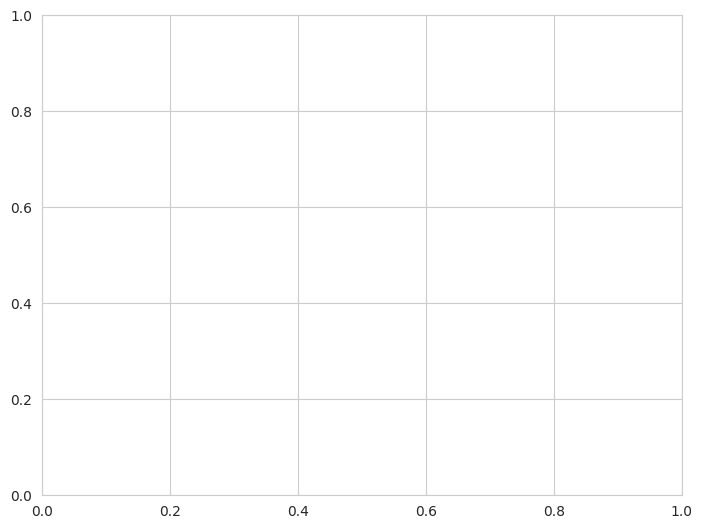

In [226]:
nk.viztasks.drawGraph(graph_)
plt.show()

In [170]:
!pip install /kaggle/input/compiled-libs/scipy-1.8.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl

Processing /kaggle/input/compiled-libs/scipy-1.8.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl
  Attempting uninstall: scipy
    Found existing installation: scipy 1.11.4
    Uninstalling scipy-1.11.4:
      Successfully uninstalled scipy-1.11.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cuml 23.8.0 requires cupy-cuda11x>=12.0.0, which is not installed.
cuml 23.8.0 requires dask==2023.7.1, but you have dask 2023.11.0 which is incompatible.
cuml 23.8.0 requires distributed==2023.7.1, but you have distributed 2023.11.0 which is incompatible.
esda 2.5.1 requires scipy>=1.9, but you have scipy 1.8.0 which is incompatible.
featuretools 1.28.0 requires scipy>=1.10.0, but you have scipy 1.8.0 which is incompatible.
jax 0.4.20 requires scipy>=1.9, but you have scipy 1.8.0 which is incompatible.
jaxlib 0.4.20+cuda11.cudnn86 requires scipy>=1.9, but y

In [171]:
!pip install networkx==2.6.0 #!!!!!!!!!

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 32.1 MB/s eta 0:00:00a 0:00:01
Reason for being yanked: Need to resolve: https://github.com/networkx/networkx/pull/4967
  Attempting uninstall: networkx
    Found existing installation: networkx 3.2.1
    Uninstalling networkx-3.2.1:
      Successfully uninstalled networkx-3.2.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
momepy 0.6.0 requires shapely>=2, but you have shapely 1.8.5.post1 which is incompatible.
scikit-image 0.21.0 requires networkx>=2.8, but you have networkx 2.6 which is incompatible.
ydata-profiling 4.5.1 requires numpy<1.24,>=1.16.0, but you have numpy 1.24.3 which is incompatible.


In [ ]:
# scipy==1.8.0
# networkx==2.6

In [114]:
!pip install networkit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 59.5 MB/s eta 0:00:0000:0100:01


In [173]:
import networkit as nk

In [108]:
len(all_edges_scored_85[0])

8398

In [88]:
len(z)

3450

In [46]:
len(new_edges), data_graph.edge_index.size(1)

(5024, 6898)

In [29]:
len(pred)

5

In [ ]:
G = nx.dodecahedral_graph()

edges = nx.draw_networkx_edges(G, pos=nx.spring_layout(G))

In [166]:
data_graph

Data(x=[3450, 312], edge_index=[2, 6900], y=[3450, 312])

In [146]:
edge_matrix

tensor([[   0,    1,    1,  ..., 3449, 3449, 3450],
        [   1,    0,    2,  ..., 3448, 3450, 3449]])

In [137]:
# edge_index = adj_t.nonzero().t().contiguous()

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [108]:
data = json.load(open('/kaggle/input/json-data/resume_d_of_a_02.json','r'))